# Simon function periodicity

In [1]:
from qlasskit import qlassf, Qint


@qlassf
def f(a: Qint[4]) -> Qint[4]:
    return (a >> 3) + 1

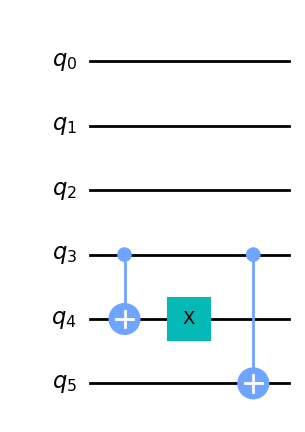

In [2]:
f.export("qiskit").draw("mpl")

In [3]:
from qlasskit.algorithms import Simon

q_algo = Simon(f)

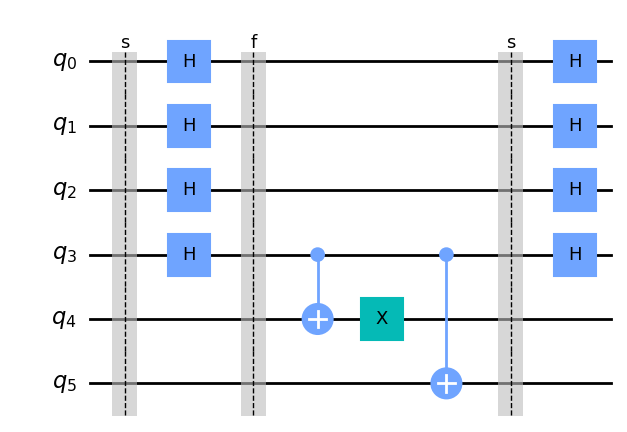

In [4]:
qc = q_algo.export("qiskit")
qc.draw("mpl")

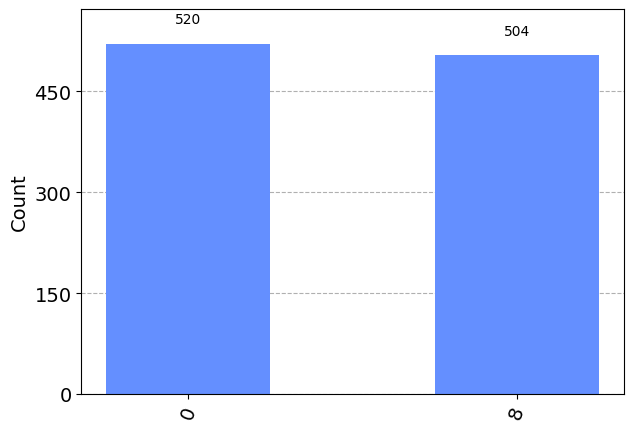

In [5]:
from qiskit import Aer, QuantumCircuit, transpile
from qiskit.visualization import plot_histogram

qc.measure_all()
simulator = Aer.get_backend("aer_simulator")
circ = transpile(qc, simulator)
result = simulator.run(circ).result()
counts = result.get_counts(circ)

counts_readable = q_algo.decode_counts(counts)
plot_histogram(counts_readable)